# Simple Regression $\,\, \tiny\text{Application Exercise Solution | Redfin (Real Estate)}$
<img src="banner redfin.jpg" align=left>

<br>
### About the Business Situation and Data
___
The data here describe 639 homes that are currently for sale in San Francisco. For each home, the data includes information on the type of property (condo, single family home, etc.), the list price of the home, the number of bedrooms, the number of bathrooms, the neighborhood, the floor area, the address, the listing price, number of days the home has been on the market, and other information.

These data were downloaded from Redfin.com on May 22, 2017.  Since Redfin.com limits downloads to 350 records, the data were downloaded in three pieces above and below \$1.25M and \$2.5M, then stitched together.  Download was done using the Table | Download All feature.  Multi-family, land, and other property types were excluded.  100+ records with missing floor area information were dropped, as well as one record with floor area of 1sqft.

This business application is based on assignments from Berkeley MBA200S and MBA296-31.

<br>
### Apparatus
___
Load function libraries, define additional useful functions, and set defaults here.

In [1]:
options(warn=-1)

# Load some required functions
library(ggplot2,  verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
library(timeDate, verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)

# Define some visualization constants
restore = list(repr.plot.width=8, repr.plot.height=3)
PALETTE = c("#00A9FF", "#F8766D", "#7CAE00", "#C77CFF", "#CD9600", "#00BE67", "#FF61CC", "#00BFC4")

# Set some visualization formatting defaults    
options(restore)
options(digits=10, scipen=100) # expose many digits, use scientific notation sparingly
options(repr.matrix.max.cols=27) # ensure all 27 columns of a data frame can be presented
update_geom_defaults("point", list(size=0.25, colour=PALETTE[3]))
update_geom_defaults("line", list(size=0.15))
update_geom_defaults("bar", list(colour=NA, fill=PALETTE[3]))
theme_update(plot.title=element_text(size=10, hjust=0.5), plot.subtitle=element_text(size=8, face="italic", hjust=0.5), axis.title=element_text(size=7), axis.text=element_text(size=7), strip.text=element_text(size=7), strip.text.y=element_text(angle=90), legend.title=element_blank(), legend.text=element_text(size=7))

<br>
### Retrieve Data
___

In [2]:
data = read.csv("../Data/DATASET_Home_Prices.csv", header=TRUE)
dim(data)
data

[1] 639  27

SALE.TYPE,SOLD.DATE,PROPERTY.TYPE,ADDRESS,CITY,STATE,ZIP,PRICE,BEDS,BATHS,LOCATION,SQUARE.FEET,LOT.SIZE,YEAR.BUILT,DAYS.ON.MARKET,X..SQUARE.FEET,HOA.MONTH,STATUS,NEXT.OPEN.HOUSE.START.TIME,NEXT.OPEN.HOUSE.END.TIME,URL..SEE.http...www.redfin.com.buy.a.home.comparative.market.analysis.FOR.INFO.ON.PRICING.,SOURCE,MLS.,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
MLS Listing,NA,Condo/Co-op,725 Pine St #204,San Francisco,CA,94108,193724,0,1.0,Downtown,288,NA,1920,116,673,507,Active,,,http://www.redfin.com/CA/San-Francisco/725-Pine-St-94108/unit-204/home/17306113,San Francisco MLS,453971,N,Y,37.7910139,-122.4076970
MLS Listing,NA,Condo/Co-op,260 King St #401,San Francisco,CA,94107,212624,0,1.0,Mission Bay,703,NA,2004,18,302,750,Active,,,http://www.redfin.com/CA/San-Francisco/260-King-St-94107/unit-401/home/12401923,San Francisco MLS,457588,N,Y,37.7772049,-122.3940134
MLS Listing,NA,Single Family Residential,256 Limerick Rd,Buda,TX,78610,240936,3,2.0,Kyle/Buda/San Marcos,1693,6000,2017,5,142,31,Active,,,http://www.redfin.com/TX/Buda/256-Limerick-Rd-78610/home/113889598,ACTRIS,9990469,N,Y,37.7783660,-122.3899080
MLS Listing,NA,Condo/Co-op,901 Bayshore Blvd #203,San Francisco,CA,94124,330000,1,1.0,Silver Terrace,606,NA,2003,21,545,336,Active,,,http://www.redfin.com/CA/San-Francisco/901-Bayshore-Blvd-94124/unit-203/home/11743704,San Francisco MLS,457543,N,Y,37.7326762,-122.4042747
MLS Listing,NA,Condo/Co-op,901 Bayshore Blvd #406,San Francisco,CA,94124,340000,1,1.0,Silver Terrace,550,NA,2003,21,618,311,Active,,,http://www.redfin.com/CA/San-Francisco/901-Bayshore-Blvd-94124/unit-406/home/12401952,San Francisco MLS,457542,N,Y,37.7326762,-122.4042747
MLS Listing,NA,Condo/Co-op,1450 Post St #412,San Francisco,CA,94109,350000,1,1.0,Lower Pacific Height,715,NA,1992,12,490,4544,Active,,,http://www.redfin.com/CA/San-Francisco/1450-Post-St-94109/unit-412/home/571788,San Francisco MLS,455844,N,Y,37.7863607,-122.4258197
MLS Listing,NA,Townhouse,100 Otter Cove Ter,San Francisco,CA,94134,371790,3,3.5,Bayview Heights,1525,9717,2010,20,244,383,Active,,,http://www.redfin.com/CA/San-Francisco/100-Otter-Cove-Ter-94134/home/45438551,San Francisco MLS,457563,N,Y,37.7122400,-122.3948390
MLS Listing,NA,Condo/Co-op,1200 California St Unit MR11,San Francisco,CA,94109,379000,0,1.0,Nob Hill,260,NA,NA,14,1458,303,Active,,,http://www.redfin.com/CA/San-Francisco/1200-California-St-94109/unit-MR11/home/12400447,San Francisco MLS,457800,N,Y,37.7916560,-122.4145259
MLS Listing,NA,Condo/Co-op,370 Imperial Way #113,DALY CITY,CA,94015,388000,1,1.0,DALY CITY,717,NA,1974,167,541,352,Active,,,http://www.redfin.com/CA/Daly-City/370-Imperial-Way-94015/unit-113/home/1662487,MLSListings,ML81633310,N,Y,37.6657071,-122.4641064
MLS Listing,NA,Condo/Co-op,195 7th St #307,San Francisco,CA,94103,399000,0,1.0,South of Market,298,NA,1991,21,1339,309,Active,May-27-2017 02:00 PM,May-27-2017 04:00 PM,http://www.redfin.com/CA/San-Francisco/195-7th-St-94103/unit-307/home/1292370,San Francisco MLS,457449,N,Y,37.7783013,-122.4094944


<br>
### Descriptive Statistics
___

#### (a) What is the mean list price in these data?  What is the standard deviation of the list price?  Be sure to indicate the correct units for both measures.

In [3]:
price.mean = mean(data$PRICE)
price.sd = sd(data$PRICE)
data.frame(price.mean, price.sd)

price.mean,price.sd
1967076.977,2354229.686


<br>
#### (b) What is the median list price? What does this tell you about the skew of the distribution of home prices in San Francisco?

In [4]:
price.median = median(data$PRICE)
data.frame(price.median)

price.median
1299000


Home prices are right skewed, indicating that while most homes in San Francisco are expensive, some are very expensive.

<br>
### Simple Regression Model
___

#### (a) Estimate a regression in which list price is the response variable and floor area is the explanatory variable.

In [5]:
model = lm(PRICE ~ SQUARE.FEET, data)
summary(model)


Call:
lm(formula = PRICE ~ SQUARE.FEET, data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-6293901.0  -482884.6    59400.1   435675.3  9832172.3 

Coefficients:
                 Estimate    Std. Error  t value               Pr(>|t|)    
(Intercept) -705001.83863   80653.68089 -8.74110 < 0.000000000000000222 ***
SQUARE.FEET    1523.23525      36.74746 41.45144 < 0.000000000000000222 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1225302 on 637 degrees of freedom
Multiple R-squared:  0.7295372,	Adjusted R-squared:  0.7291126 
F-statistic: 1718.222 on 1 and 637 DF,  p-value: < 0.00000000000000022204


<br>
#### (b) What is $R^2$ for the model?  What is the coefficent for the explanatory variable?

In [6]:
R2 = summary(model)$r.squared
coefficent.of.SQUARE.FEET = unname(model$coefficients["SQUARE.FEET"])
data.frame(R2, coefficent.of.SQUARE.FEET)

R2,coefficent.of.SQUARE.FEET
0.7295371819,1523.235246


<br>
#### (c) How do you interpret the slope?  Be sure to use the correct units.

Each additional sqft of floor area is associated with a $1,523 increase in the list price.

<br>
#### (d) Construct the scatterplot with regression line.  Label the units on both axes.

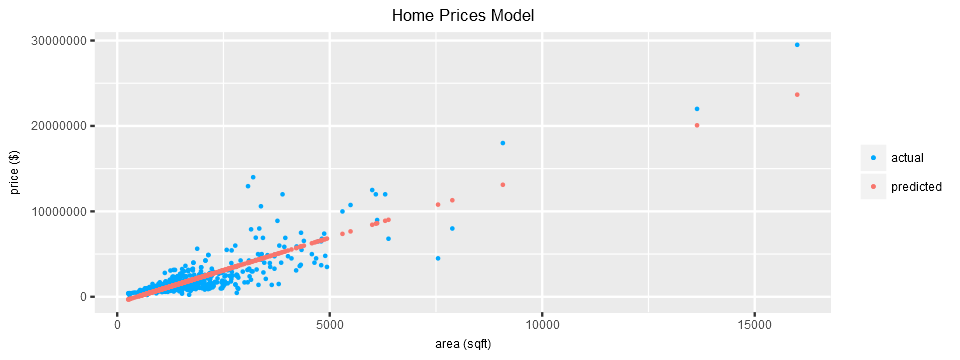

In [7]:
ggplot(data) +
geom_point(aes(x=SQUARE.FEET, y=PRICE, color="actual")) +
geom_point(aes(x=SQUARE.FEET, y=predict(model), color="predicted")) +
scale_color_manual(values=c(actual=PALETTE[1], predicted=PALETTE[2])) +
ggtitle("Home Prices Model") + xlab("area (sqft)") + ylab("price ($)")

<br>
#### (e) What does the model predict for a 450sqft home?  What is going on?

In [8]:
# Calculate predicted price at 450sqft using formula

i = model$coefficients["(Intercept)"]
c = model$coefficients["SQUARE.FEET"]
y = i + c*450

data.frame(predicted.price.at.450sqft=y)

,predicted.price.at.450sqft
(Intercept),-19545.97802


In [9]:
# Calculate predicted price at 450sqft using predict function

y = predict(model, data.frame(SQUARE.FEET=450))
data.frame(predicted.price.at.450sqft=y)

predicted.price.at.450sqft
-19545.97802


This is the equation to predict price: $\text{Predicted price} = -\$705002 + \$1523/\text{sqft} \times SQUARE.FEET$

Evaluating the equation at 450sqft yields -\$19,546, which can be interpretted as they pay you for this house. Thought these are the intercept and slope which best fit the data, clearly the model doesn’t do well for very small homes.

<br>
### Conditions for Inference
___

#### (a) Are the variances of the residuals similar for homes with different floor area?  Briefly discuss implications.

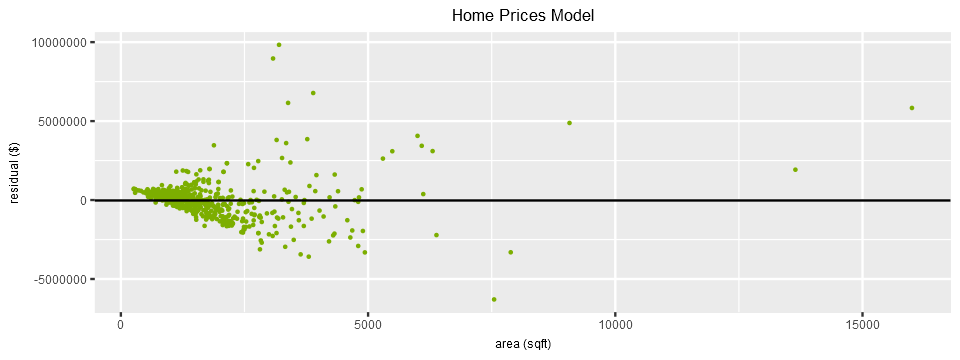

In [10]:
data$residual = model$residuals

ggplot(data) +
geom_point(aes(x=SQUARE.FEET, y=residual)) +
geom_hline(aes(yintercept=0)) +
ggtitle("Home Prices Model") + xlab("area (sqft)") + ylab("residual ($)")

No, definitely not. The scatter plot and residual plot show that the variance of residuals increases dramatically with larger homes. This violates one of the conditions necessary for inference.  Consequently, we should not trust the standard errors from this regression, nor should we construct confidence intervals, hypothesis tests, or prediction intervals.

<br>
#### (b) Is the sample size condition satisfied?  Briefly explain why or why not.

In [11]:
n = nrow(data)
k = kurtosis(model$residuals, method="fisher")

data.frame(sample.size=n, kurtosis.of.residuals=k)

sample.size,kurtosis.of.residuals
639,15.28244023


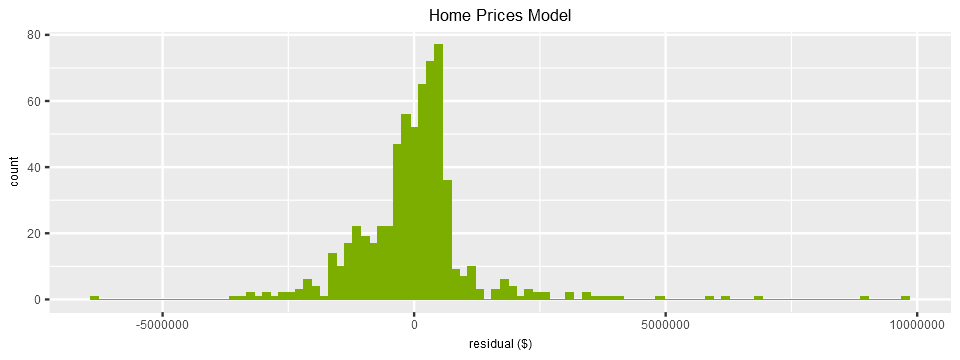

In [12]:
data$residual = model$residuals

ggplot(data) +
geom_histogram(aes(residual), bins=100) +
ggtitle("Home Prices Model") + xlab("residual ($)")

Yes, the sample size condition is easily satisfied. The kurtosis of the residuals turns out to be 15.3. The sample size shout be at least 10 times the absolute value of the kurtosis which it is easily. From a histogram of the residuals, their distribution looks approximately normal.

<br>
#### (c) Is the slope statistically significant at the 1% level? How can you tell?

In [13]:
p = summary(model)$coefficients["SQUARE.FEET","Pr(>|t|)"]

data.frame(pvalue.of.coefficient.of.SQUARE.FEET=p)

pvalue.of.coefficient.of.SQUARE.FEET
4.945216212e-183


The p-value is microscopic, indicating a statistically significant relationship between SQUARE.FEET and PRICE.

<br>
#### (d) Find the 95% prediction interval for a 2,000 square foot home?  Be sure to use the correct units.  Is this an extrapolation?

In [14]:
# Calculate 95% prediction interval at 2000sqft using formula (approximate)

i = unname(model$coefficients["(Intercept)"])
c = unname(model$coefficients["SQUARE.FEET"])
y = i + c*2000 # predicted price at 2000sqft

se = summary(model)$sigma
upper_approx = max(0, y+2*se)
lower_approx = max(0, y-2*se)

data.frame(predicted.price=y, standard.error=se, prediction.interval.upper=upper_approx, prediction.interval.lower=lower_approx)

predicted.price,standard.error,prediction.interval.upper,prediction.interval.lower
2341468.653,1225302.274,4792073.2,0


In [15]:
# Calculate 95% prediction interval at 2000sqft using formula

i = model$coefficients["(Intercept)"]
c = model$coefficients["SQUARE.FEET"]
y = i + c*2000 # predicted price at 2000sqft

s1 = sqrt(sum(model$residuals^2)/(nrow(data)-model$rank)) # standard error accounts for uncertainty in the regression line
s2 = sqrt(1 + (1/nrow(data)) + (((2000-mean(data$SQUARE.FEET))^2) / sum((data$SQUARE.FEET-mean(data$SQUARE.FEET))^2))) # accounts for uncertainty in the specific observation 
t = qt((1-0.95)/2, model$df.residual, lower.tail=FALSE) # t-statistic for 95% level with 637 degrees of freedom

upper = max(0, y+t*s1*s2)
lower = max(0, y-t*s1*s2)

data.frame(prediction.interval.upper=upper, prediction.interval.lower=lower)

prediction.interval.upper,prediction.interval.lower
4749536.005,0


In [16]:
# Calculate 95% prediction interval at 2000sqft using predict function

y = predict(model, data.frame(SQUARE.FEET=2000))

upper = max(0, predict(model, data.frame(SQUARE.FEET=2000), interval="prediction", level=0.95)[, "upr"])
lower = max(0, predict(model, data.frame(SQUARE.FEET=2000), interval="prediction", level=0.95)[, "lwr"])

data.frame(prediction.interval.upper=upper, prediction.interval.lower=lower)

prediction.interval.upper,prediction.interval.lower
4749536.005,0


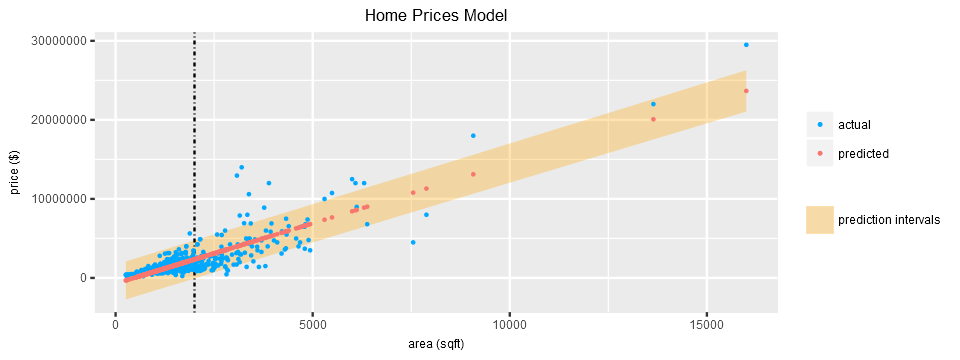

In [17]:
data$upper = predict(model, data, interval="prediction", level=0.95)[, "upr"]
data$lower = predict(model, data, interval="prediction", level=0.95)[, "lwr"]

ggplot(data) +
geom_ribbon(aes(x=SQUARE.FEET, ymax=upper, ymin=lower, fill="prediction intervals"), alpha=0.3) +
geom_vline(aes(xintercept=2000), linetype="dotdash") +
geom_point(aes(x=SQUARE.FEET, y=PRICE, color="actual")) +
geom_point(aes(x=SQUARE.FEET, y=predict(model), color="predicted")) +
scale_color_manual(values=c(actual=PALETTE[1], predicted=PALETTE[2])) +
scale_fill_manual(values=c("prediction intervals"="orange")) +
ggtitle("Home Prices Model") + xlab("area (sqft)") + ylab("price ($)")

The equation to predict price is the same as before:
$ \text{Predicted price} = -\$705001 + \$1523/\text{sqft} \times SQUARE.FEET$

Evaluating the equation at 2000sqft yields \$2.34 million. The 95th prediction interval is approximately this $\pm$2 standard error.  Here standard error is \$1.22 million, so the prediction interval is \[\$0, \$4.79M\], clipped to keep the lower bound non-negative. The very wide prediction interval reflects the enormous range of values for homes.

As an approximation at 95% level, you can use this formula for a prediction interval:

$$
\text{bounds of prediction interval at } x \text{ (approximate)} \quad = \quad 
\underbrace{\hat{y}}_{\text{prediction at } x} \quad \pm \quad
\underbrace{2 \, s_e}_{2 \, \times \, \text{standard error of regression line}}
$$


You can alternatively use the precise formula for a prediction interval: 

$$
\text{bounds of prediction interval at } x \quad = \quad 
\underbrace{\hat{y}}_{\text{prediction at } x} \quad \pm \quad
\underbrace{\left ( t_{\frac{1-\alpha}{2}, \, df} \right ) }_\text{t-statistic} \quad
\underbrace{\sqrt{\frac{1}{n-rank(n)}\sum_{i=1}^n(y_i-\hat{y_i})^2}}_{\text{standard error of regression line}} \quad
\underbrace{\sqrt{1 + \frac{1}{n} + \frac{(x-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}}_{\text{ accounts for uncertainty specifically at } x}
$$

$\tiny \text{Copyright (c) Berkeley Data Analytics Group, LLC}$